# Bike Sharing Data Analysis Project








*   Name: Akmal Nuur Fauzan
*   Email: akmalnuurfauzan14@gmail.com

# Business Question

1.   How do bike rentals vary across different seasons and times of the year?
1.   Is there a noticeable difference in bike rentals on holidays versus working days?
2.   How has the company's sales performance been in 2011 - 2012?

# Import Library

In [ ]:
!pip install seaborn --upgrade

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots

# Data Wrangling

## Data Gathering

In [ ]:
# Download using gdown
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 79.4MB/s]


In [ ]:
# Extract file zip
content = 'Bike-sharing-dataset.zip'
zip = zipfile.ZipFile(content, 'r')
zip.extractall('data/')
zip.close()

### Data Loading

In [ ]:
dfh = pd.read_csv('data/hour.csv')
dfh

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
dfd = pd.read_csv('data/day.csv')
dfd

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight**


Dataframe memuat terkait history bike sharing dari rentang waktu tahun 2011-2012



## Assesing Data

In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Create a function for assesing data dataframe hour and call the function

---



In [ ]:
# Function for assesing data
def data_assesing(data):

  # display the total number of NaN and Null values in each column, sorted in descending order
  print(f'Total NaN/Null Data per Column:\n{data.isna().sum().sort_values(ascending=False)}\n')

  # display the shape of the dataset
  print(f'Data Frame: \n{data.shape}')

  #Total duplicated data in dataset
  print(f'\nTotal Duplicated Data: {data.duplicated().sum()}')

data_assesing(dfh)

Total NaN/Null Data per Column:
instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64

Data Frame: 
(17379, 17)

Total Duplicated Data: 0


In [ ]:
dfh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


call function for assesing data dataframe hour

---



In [ ]:
data_assesing(dfd)

Total NaN/Null Data per Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Frame: 
(731, 16)

Total Duplicated Data: 0


**Generate Descriptive statistic for dataset day.csv and hour.csv**

---



In [ ]:
dfh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
dfd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**


*   Didn't have any duplicated data from dataset day.csv and hour.csv
*   And don't have any particular missing value from dataset day.csv and hour.csv



## Cleaning Data

**define the new variable to copying a dataframe day**

In [ ]:
dfd_new = dfd.copy()
dfd_new['dteday'] = pd.to_datetime(dfd_new['dteday'])

In [ ]:
dfd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Renaming all the column
dfd.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime'
                    }, inplace=True)

# Capitalize each column name
dfd_new.columns = dfd.columns.str.title()

# Change the 'Datetime' data type from object to datetime
dfd['Datetime'] = pd.to_datetime(dfd_new['Datetime'])


# Show the dataset
dfd_new.head(len(dfd))

,Instant,Datetime,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   Datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

**define the new variable to copying a dataframe hour**

---



In [ ]:
dfh_new = dfh.copy()
dfh_new['dteday'] = pd.to_datetime(dfh_new['dteday'])

In [ ]:
dfh_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
# Renaming all the column
dfh.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime',
                    'hr':'Hour'
                    }, inplace=True)

# Capitalize each column name
dfh_new.columns = dfh.columns.str.title()

# Change the 'Datetime' data type from object to datetime
dfh['Datetime'] = pd.to_datetime(dfh_new['Datetime'])

# Show the dataset
dfh_new.head(len(dfh_new))

,Instant,Datetime,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   Datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   Hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)



**Display casual and registered users by year**

---



In [ ]:
dfd_new.groupby(by='Year').agg({
    'Registered': 'sum',
    'Casual': 'sum'
})

,Registered,Casual
Year,,
0,995851,247252
1,1676811,372765


**Seasons Dictionary**


1.   Spring
1.   Summer
1.   Fall
2.   Winter



**Display the number of users by seasons**


---



In [ ]:
dfd_new.groupby(by='Season').Count.sum().sort_values(ascending=False).reset_index().head(10)

,Season,Count
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


**Insight:**

The fall season experiences the highest number of bicycle rentals, with approximately 1 million users, as shown in the table.


In [ ]:
dfd_new.groupby(by='Month').Count.sum().sort_values(ascending=False).reset_index().head(len(dfd))

,Month,Count
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


**Insight:**

In August, the number of bicycle rentals peaked, with over 350,000 users, marking the highest usage recorded throughout the year.

In [ ]:
# display the number of users
dfh_new.groupby(by='Hour').Count.sum().sort_values(ascending=False).reset_index().head(len(dfh))

,Hour,Count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


**Insight:**

The data shows that the peak time for bike rentals is around 5 p.m., with most users opting to rent in the late afternoon. During this time, the total number of users exceeds 300,000.

In [ ]:
corr = dfd_new.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Apply the mask to correlation matrix
corr_masked = corr.mask(mask)
# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_masked.values,
    x=corr_masked.columns,
    y=corr_masked.index,
    colorscale=[(0, '#636EFA'), (0.5, 'white'), (1, '#EF553B')],
    zmin=-1,
    zmax=1,
    text=np.round(corr_masked.values, 2),
    hoverinfo='text'
))
# Add annotations
annotations = []
for i in range(len(corr_masked)):
  for j in range(len(corr_masked)):
    if not mask[i, j]:
      annotations.append(
          dict(
            x=corr_masked.columns[i],
            y=corr_masked.index[j],
            text=str(np.round(corr_masked.iloc[i, j], 2)),
            showarrow=False,
            font=dict(color='black')
          )
      )
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    title='Correlation Heatmap',
    annotations=annotations,
    xaxis=dict(tickmode='array', tickvals=list(range(len(corr.columns))), ticktext=corr.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(corr.index))), ticktext=corr.index)
)

fig.show()

**Insight:**

Based on the table above, the heatmap correlation reveals a strong relationship between the variables 'temp' and 'atemp,' with a correlation value of 0.99. Additionally, there is a significant correlation between the 'registered' and 'count' variables, showing a value of 0.95.

# Visualization & Explanatory Analysis

**Business Question**

1.   How do bike rentals vary across different seasons and times of the year?
1.   Is there a noticeable difference in bike rentals on holidays versus working days?
2.   What trends can be observed in the company's sales performance during 2011 and 2012?


### Question 1
How do bike rentals vary across different seasons and times of the year?

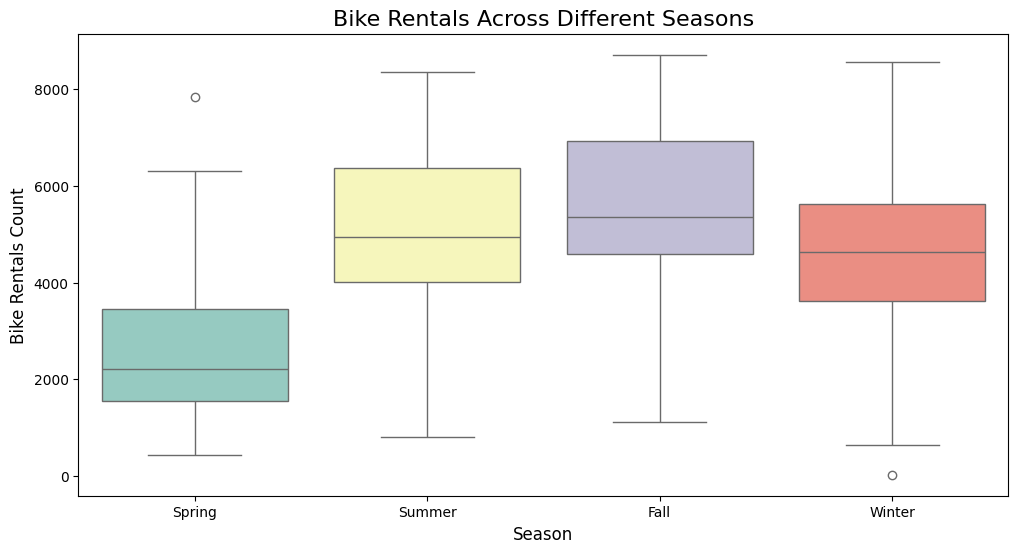

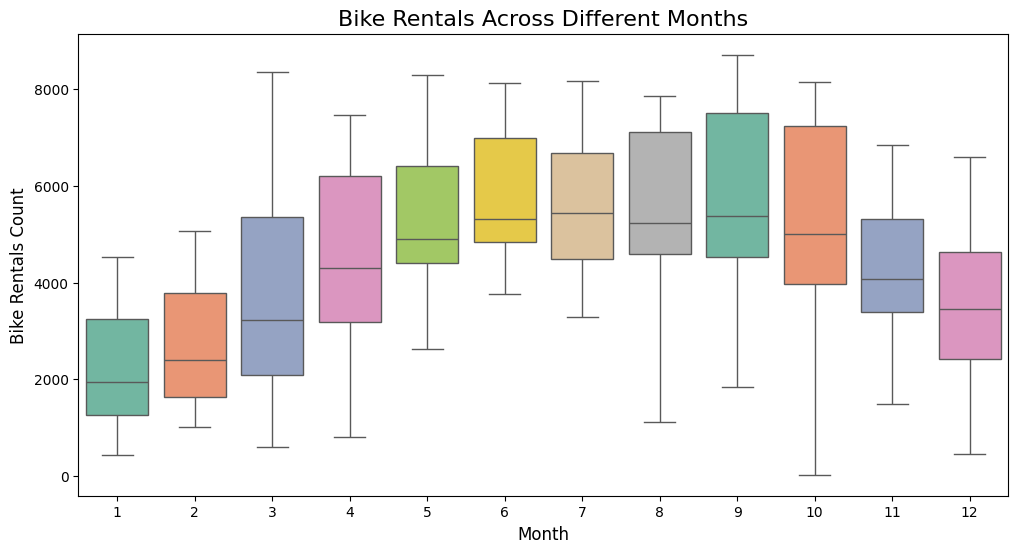

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
dfd_new['Season'] = dfd_new['Season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Plot rentals across seasons and months
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Count', data=dfd_new, palette='Set3')

# Add title and labels
plt.title('Bike Rentals Across Different Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Bike Rentals Count', fontsize=12)

# Show plot
plt.show()

# Plot rentals across months
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Count', data=dfd_new, palette='Set2')

# Add title and labels
plt.title('Bike Rentals Across Different Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Bike Rentals Count', fontsize=12)

# Show plot
plt.show()

**Insight:**

To analyze how bike rentals vary across different seasons and times of the year, the first bar plot shows that the fall season experiences the highest number of bike rentals. Similarly, the second bar plot reveals that September has the peak rental activity throughout the year.

### Question 2
Is there a noticeable difference in bike rentals on holidays versus working days?

In [ ]:
# Group data by holiday and calculate the average number of bike rentals
df_grouped = dfd_new.groupby(by='Holiday')['Count'].mean().reset_index()

# Map holiday values for more readability
df_grouped['day_type'] = df_grouped['Holiday'].map({
    0: 'Working Day',
    1: 'Holiday'
})

# Create a bar plot
fig = px.bar(
    df_grouped,
    x='Holiday',
    y='Count',
    title='Average Bike Rentals on Holidays vs. Working Days',
    labels={'Count': 'Average Bike Rentals', 'Holiday': 'Day Type'},
    color='Holiday',
    color_discrete_map={'Working Day': '#636EFA', 'Holiday': '#EF553B'},
)

# Update Layout
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Day Type',
    yaxis_title='Average Bike Rentals',
    showlegend=False,
)

fig.show()

**Insight:**

From the visualization, we can observe a noticeable difference in bike rentals between holidays and working days. On average, bike rentals are higher on holidays compared to working days.

### Question 3

What trends can be observed in the company's sales performance during 2011 and 2012?

In [ ]:
# Create a figure
fig = go.Figure()

# Add trace for Registered users
fig.add_trace(go.Scatter(x=dfd_new['Datetime'], y=dfd_new['Registered'], mode='lines', name='Registered', marker_color='#636EFA'))

# Add trace for Casual users
fig.add_trace(go.Scatter(x=dfd_new['Datetime'], y=dfd_new['Casual'], mode='lines', name='Casual', marker_color='#EF553B'))

# Update layout
fig.update_layout(
    width=1000,
    height=600,
    title='Registered and Casual Users Over Time',
    xaxis_title='Datetime',
    yaxis_title='Count',
    hovermode='x unified',  # Show hover for both traces at the same time
    xaxis=dict(
        tickformat='%Y-%m-%d',  # Date formatting for better readability
        rangeslider_visible=True  # Optional: enable range slider
    )
)

fig.show()

**Insight:**

Based on the visualization above, the highest number of orders occurred in September. Additionally, there is a noticeable drop in the number of users from October 29 to December 25. This suggests that September was a particularly successful month in attracting a higher number of customers.

# Conclusion

## Question 1
How do bike rentals vary across different seasons and times of the year?

the first bar plot shows that the fall season experiences the highest number of bike rentals. Similarly, the second bar plot reveals that September has the peak rental activity throughout the year.

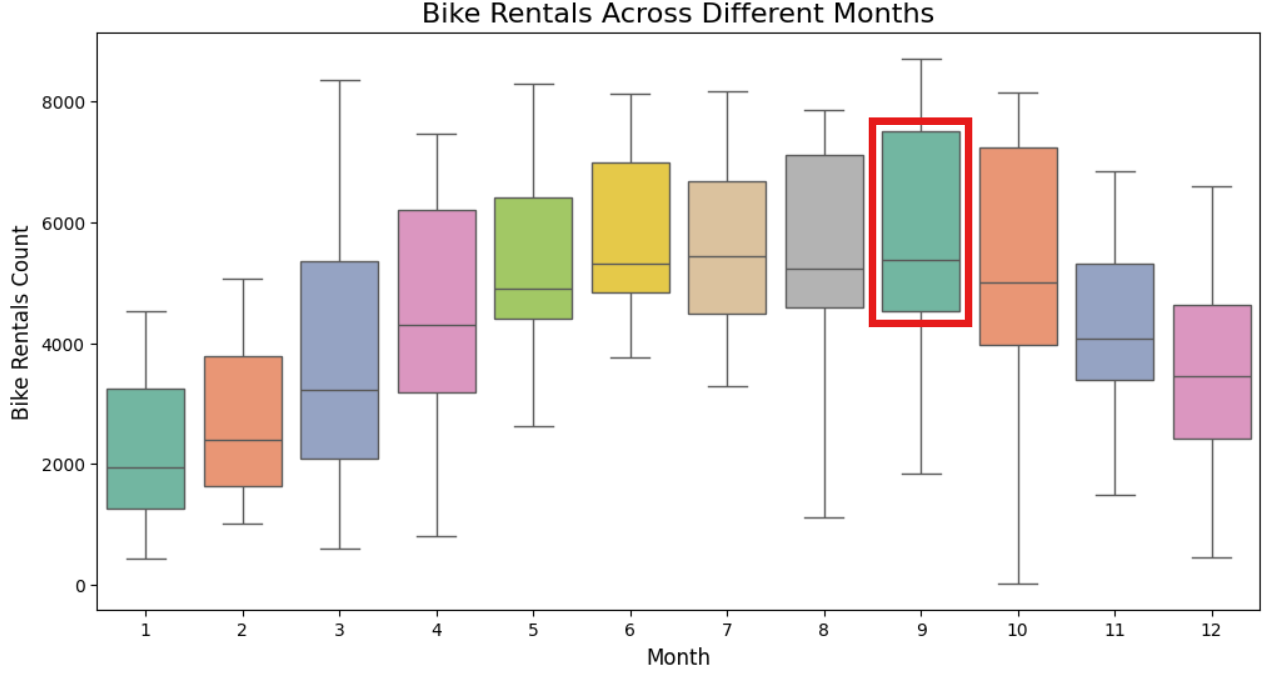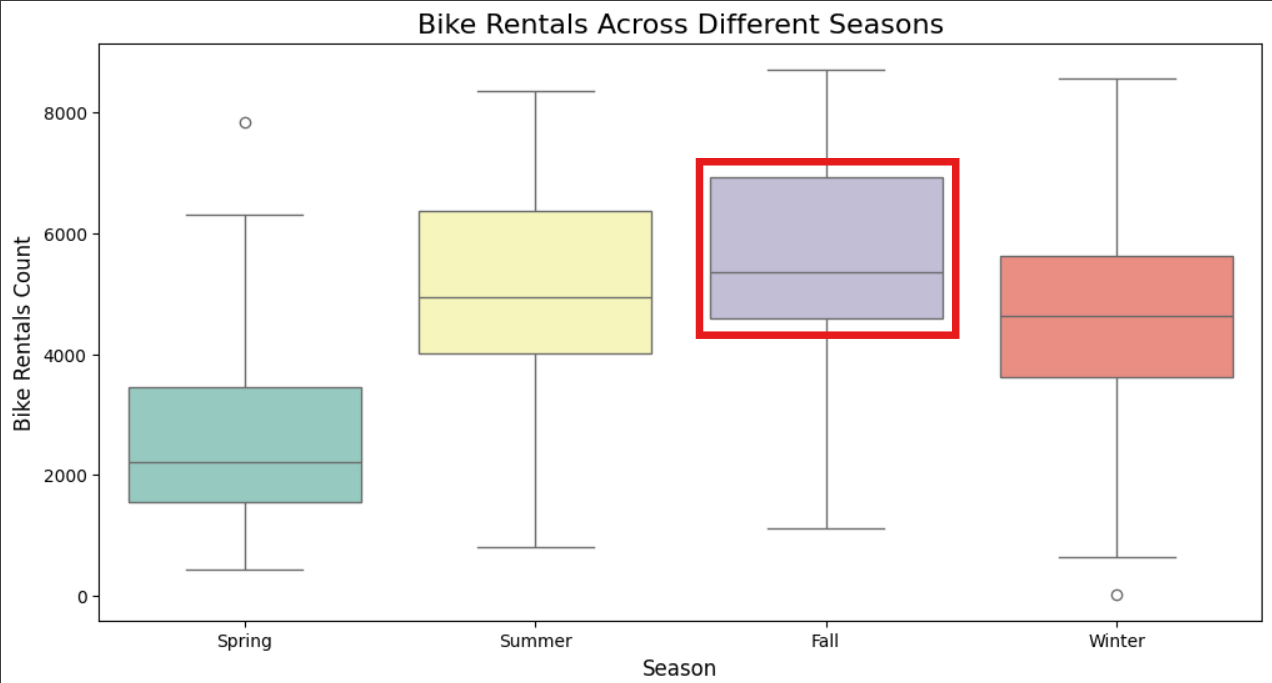

## Question 2
Is there a noticeable difference in bike rentals on holidays versus working days?

we can observe a noticeable difference in bike rentals between holidays and working days. On average, bike rentals are higher on holidays compared to working days.

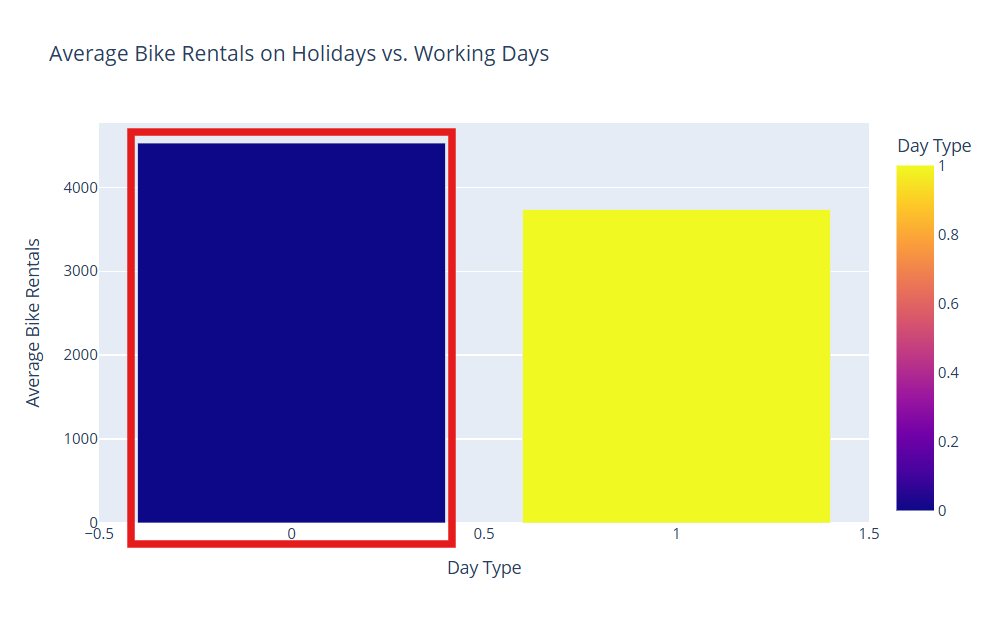

## Question 3

What trends can be observed in the company's sales performance during 2011 and 2012?

the highest number of orders occurred in September. Additionally, there is a noticeable drop in the number of users from October 29 to December 25. This suggests that September was a particularly successful month in attracting a higher number of customers.

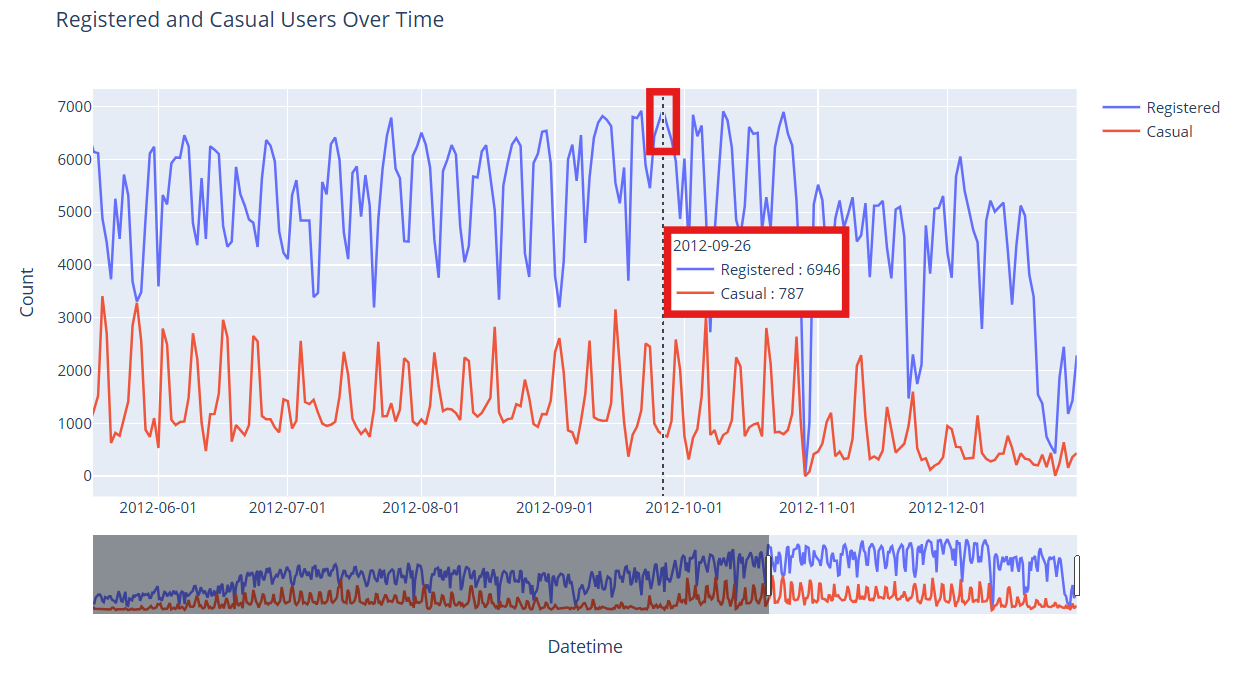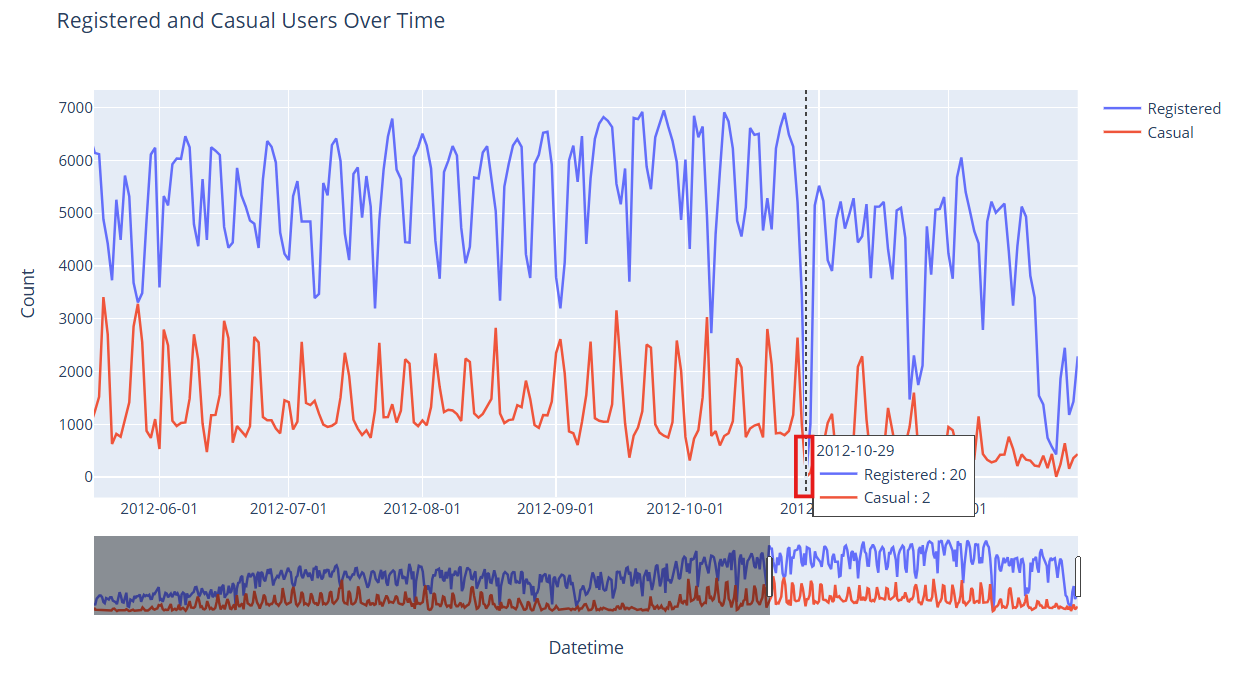

  # Implementation of Advanced Analysis Techniques

 ## RFM Analysis

  RFM (Recency, Frequency, and Monetary) analysis is a marketing technique used to segment customers based on their purchasing behavior.



1.   Recency (R): Measures how recently a customer made a purchase. The lower the recency value, the more recent the customer’s last transaction, indicating more engagement.
2.   Frequency (F): Measures how often a customer makes a purchase in a given period. Customers with higher frequency values are generally more loyal.
1.   Monetary (M): Measures how much money a customer has spent over a specific period. Higher monetary values indicate more valuable customers.





In [ ]:
dfd_new.head()

,Instant,Datetime,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:

# Grouping the data by Registered users and calculating RFM metrics
rfm_df = dfd_new.groupby(by='Registered', as_index=False).agg({
    'Datetime': 'max',  # take last rent date
    'Instant': 'nunique',  # calculate the number of rent
    'Count': 'sum'       # calculate the amount of revenue generated
})

# calculate when the customer last made a transaction (day)
rfm_df.columns = ['Registered', 'max_rent_timestamp', 'Frequency', 'Monetary']
rfm_df['max_rent_timestamp'] = rfm_df['max_rent_timestamp'].dt.date
recent_date = dfd_new['Datetime'].dt.date.max()
rfm_df['Recency'] = rfm_df['max_rent_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_rent_timestamp', axis=1, inplace=True)

rfm_df.head()



,Registered,Frequency,Monetary,Recency
0,20,1,22,63
1,416,1,431,704
2,432,1,441,5
3,451,1,754,372
4,472,1,506,705


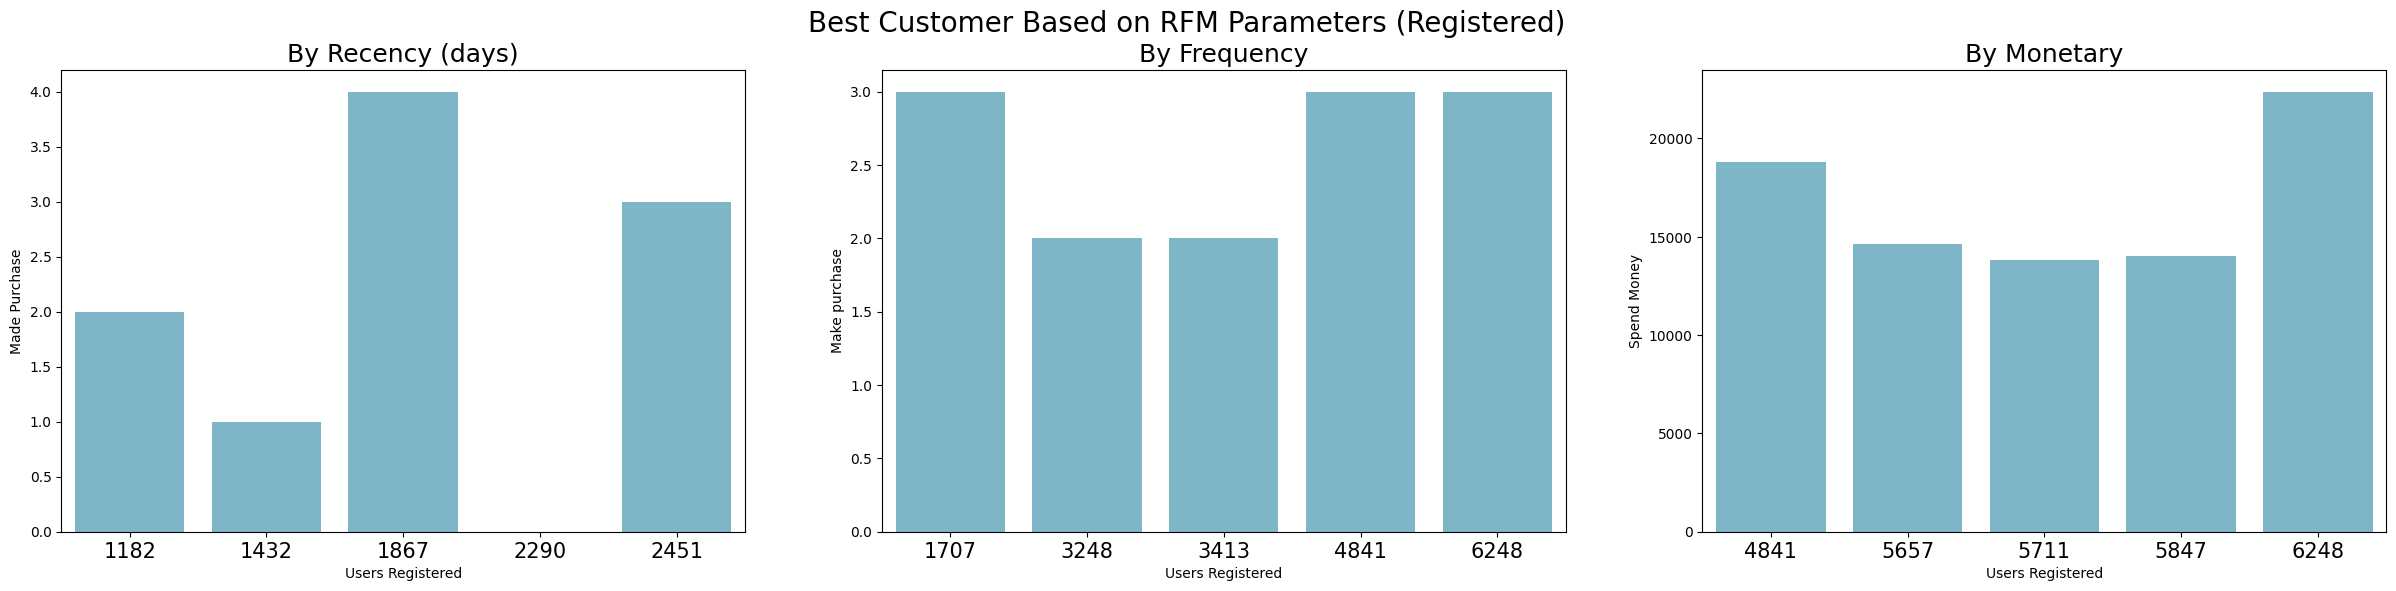

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="Registered", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel('Made Purchase')
ax[0].set_xlabel('Users Registered')
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="Frequency", x="Registered", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel('Make purchase')
ax[1].set_xlabel('Users Registered')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary", x="Registered", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel('Spend Money')
ax[2].set_xlabel('Users Registered')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Registered)", fontsize=20)
plt.show()

**Analyst Based on RFM Paramater**

Barplot(1): By Recency (days) more lower the recency value, more recent transaction

Barplot(2): By Frequency more high the frequency value, more royal the costumer

Barplot(3): By Monetary more high the monetary value, more costumer to spend the money and more valuable